In [1]:
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np

In [5]:
def plot_file(filename, name=''):
    # Read file contents
    with open(filename) as file:
        content = file.readlines()

    # Clean up content
    content = map(lambda x: x.strip().split(','), content[2:])
    content = [line for line in content if len(line) == 3]
    data = []
    for datapoint in content:
        try:
            reward, length, time = map(float, datapoint)
            data.append((time, reward, length))
        except ValueError:
            pass

    # Sort data according to time
    data.sort()
    times, rewards, lengths = zip(*data)
    
    # Calculate timesteps
    timesteps = []
    timestep = 0
    for length in lengths:
        timestep += length
        timesteps.append(timestep)

    # Calculate reward/timestep
    reward_per_timestep = []
    for reward, length in zip(rewards, lengths):
        reward_per_timestep.append(reward/length)
    
    # Apply Savitzky–Golay filter to smooth data
    rewards_smooth = scipy.signal.savgol_filter(rewards, 201, 2)
    lengths_smooth = scipy.signal.savgol_filter(lengths, 201, 2)
    reward_per_timestep_smooth = scipy.signal.savgol_filter(reward_per_timestep, 201, 2)
    
    fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(20, 4))
    ax1.set_ylim(top=200)
    ax1.set_xlabel('Time (s)')
    ax1.plot(times, rewards)
    ax1.plot(times, rewards_smooth, color='red')
    ax1.set_title('Reward: ' + name.title())
    
    ax2.set_ylim(top=600)
    ax2.set_xlabel('Time (s)')
    ax2.plot(times, lengths)
    ax2.plot(times, lengths_smooth, color='red')
    ax2.set_title('Episode Length: ' + name)

    ax3.set_ylim(bottom=-4, top=4)
    ax3.set_xlabel('Time (s)')
    ax3.plot(times, reward_per_timestep)
    ax3.plot(times, reward_per_timestep_smooth, color='red')
    ax3.set_title('Reward/Timestep: ' + name)

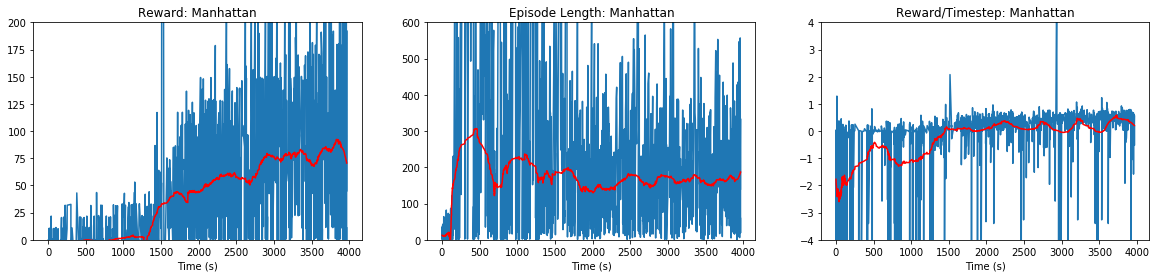

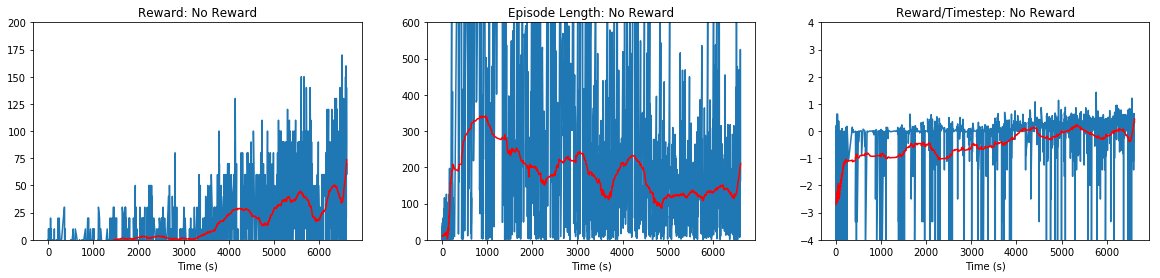

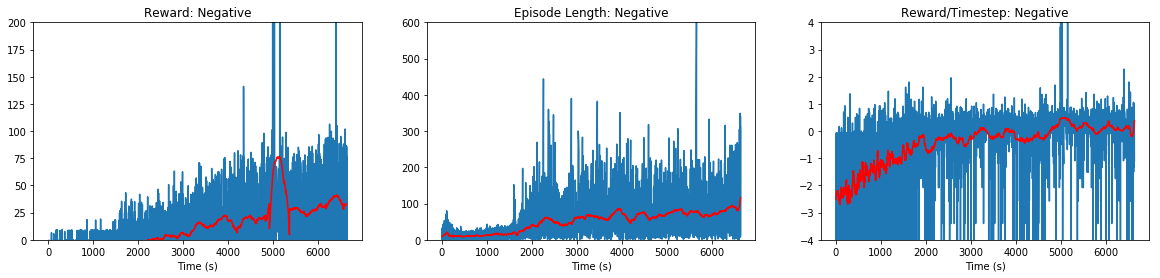

In [6]:
for plot in ['manhattan', 'no reward', 'negative']:
    plot_file('monitor/' + plot.replace(' ', '') + '.csv', name=plot.title())